# <b>FIFA 19 Data Analysis</b>

## Overview

FIFA 19 è un videogioco di calcio sviluppato da EA Sports, pubblicato il 28 settembre 2018 per PlayStation 3 (con supporto PlayStation Move), PlayStation 4, Xbox 360, Xbox One (con Kinect), Microsoft Windows e Nintendo Switch.

In questa analisi studieremo il valore dei giocatori presenti nel dataset, come esso varia all'interno della popolazione, se (ed eventualmente come) è possibile calcolare il valore di un giocatore e proveremo a classificare i giocatori per mentalità (difensiva o offensiva).

## Librerie

Importiamo le librerie che useremo nelle nostre analisi sul dataset.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data statistics
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

## Dataset

Utilizzeremo un dataset contenente le informazioni di tutti i calciatori presenti sul gioco FIFA19. Il dataset è disponibile su Kaggle all'indirizzo https://www.kaggle.com/dczerniawko/fifa19-analysis.

In [2]:
# Load dataset
original_data = pd.read_csv('input/data.csv', index_col='Unnamed: 0')
# Show dataset info
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

Il dataset contiene 18207 osservazioni ed 88 colonne: id, nome, eta, foto, nazione, bandiera, valore complessivo (overall), potenziale, club, lodo del club, valore di mercato, piede preferito, reputazione internazionale (valore da 1 a 5), piede debole (valore da 1 a 5), mosse di abilità (valore da 1 a 5), ecc...

Dato che alcuni campi non saranno oggetto della nostra analisi, effettuiamo un drop delle colonne superflue quindi mostriamo i primi 5 record.

In [3]:
# Copy dataset
data = original_data.copy()
# Drop unused columns
data = data.drop(['Photo','Flag', 'Club Logo'],1)
# Show the first five rows
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Analisi quantitativa

Visualizzamo la distribuzione del valore complessivo dei giocatori.

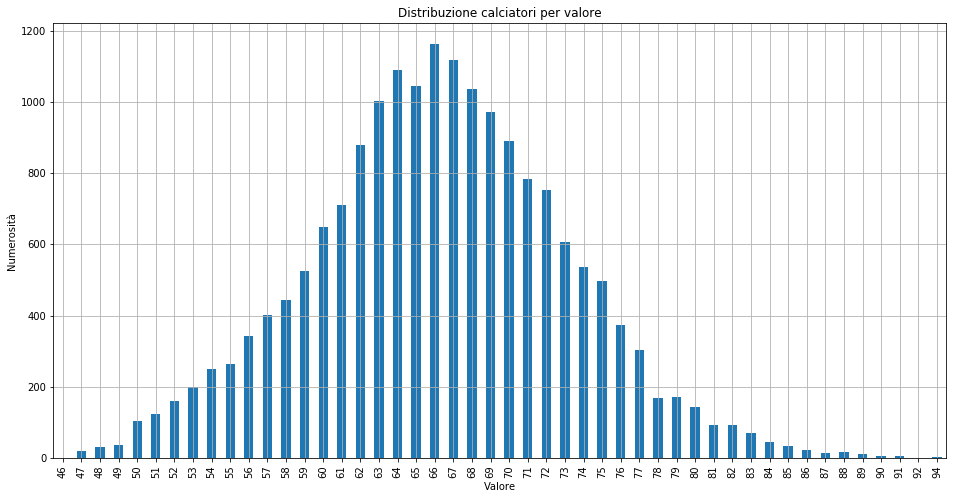

In [4]:
# Overall players distribution
data['Overall'].value_counts().sort_index().plot.bar(figsize=(16,8))
plt.title('Distribuzione calciatori per valore')
plt.xlabel('Valore')
plt.ylabel('Numerosità')
plt.grid()
plt.show()

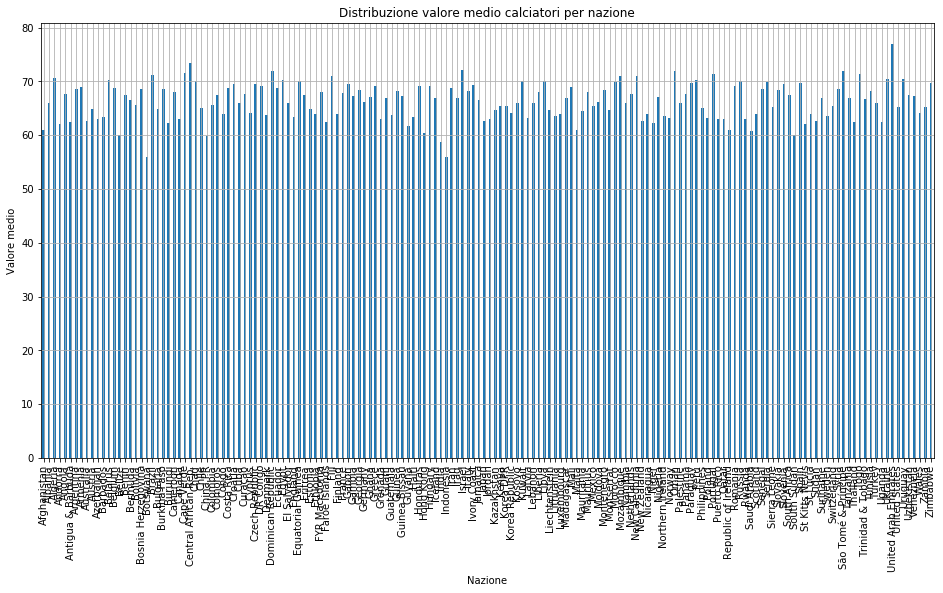

In [5]:
# Overall players distribution for nation
data.groupby('Nationality')['Overall'].mean().plot.bar(figsize=(16,8))
plt.title('Distribuzione valore medio calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

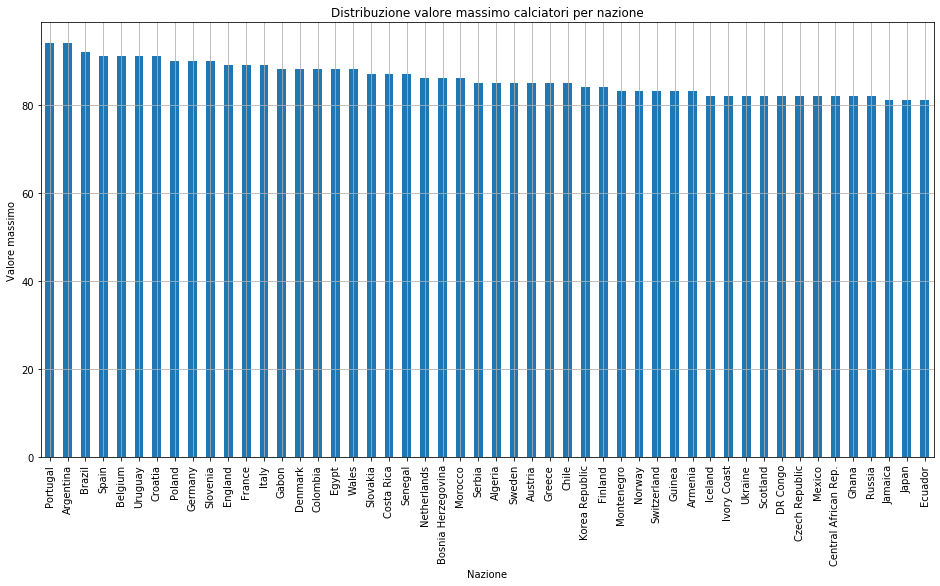

In [6]:
# Top 50 nations for max overall
data.groupby('Nationality')['Overall'].max().sort_values(ascending=False)[0:50].plot.bar(figsize=(16,8))
plt.title('Distribuzione valore massimo calciatori per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore massimo')
plt.grid()
plt.show()

In [7]:
# Top 50 nations for max overall
data.groupby('Nationality')['Overall'].max().sort_values(ascending=False)[0:50]

Nationality
Portugal                94
Argentina               94
Brazil                  92
Spain                   91
Belgium                 91
Uruguay                 91
Croatia                 91
Poland                  90
Germany                 90
Slovenia                90
England                 89
France                  89
Italy                   89
Gabon                   88
Denmark                 88
Colombia                88
Egypt                   88
Wales                   88
Slovakia                87
Costa Rica              87
Senegal                 87
Netherlands             86
Bosnia Herzegovina      86
Morocco                 86
Serbia                  85
Algeria                 85
Sweden                  85
Austria                 85
Greece                  85
Chile                   85
Korea Republic          84
Finland                 84
Montenegro              83
Norway                  83
Switzerland             83
Guinea                  83
Armenia         

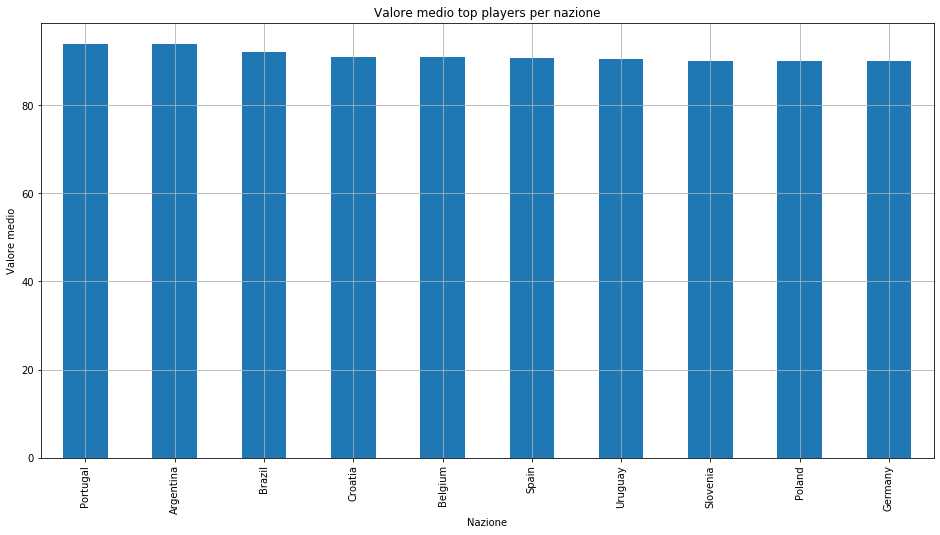

In [8]:
# Top 10 nations for mean overall
top_players_data = data[data['Overall'] >= 90]
top_players_data.groupby('Nationality')['Overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.grid()
plt.show()

In [9]:
# Top players for nations 
top_players_data.groupby('Nationality')['Overall'].value_counts()

Nationality  Overall
Argentina    94         1
Belgium      91         2
Brazil       92         1
Croatia      91         1
Germany      90         1
Poland       90         1
Portugal     94         1
Slovenia     90         1
Spain        91         2
             90         1
Uruguay      90         1
             91         1
Name: Overall, dtype: int64

Per una migliore visualizzazione dei risultati, normalizziamo il campo 'Overall' in 0-1.

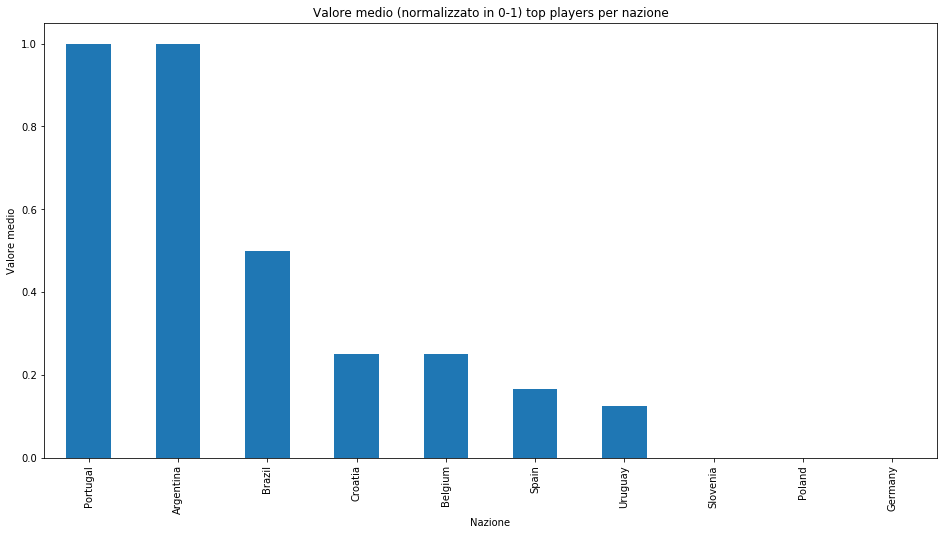

In [10]:
# Top 10 nations for mean overall (normalized version)
top_players_data_norm = data.copy()
top_players_data_norm['Overall']  = (top_players_data['Overall']-top_players_data['Overall'].min())/(top_players_data['Overall'].max()-top_players_data['Overall'].min())
top_players_data_norm.groupby('Nationality')['Overall'].mean().sort_values(ascending=False)[0:10].plot.bar(figsize=(16,8))
plt.title('Valore medio (normalizzato in 0-1) top players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Valore medio')
plt.show()

In [11]:
# Top players for nations (normalized version)
top_players_data_norm.groupby('Nationality')['Overall'].value_counts()

Nationality  Overall
Argentina    1.00       1
Belgium      0.25       2
Brazil       0.50       1
Croatia      0.25       1
Germany      0.00       1
Poland       0.00       1
Portugal     1.00       1
Slovenia     0.00       1
Spain        0.25       2
             0.00       1
Uruguay      0.00       1
             0.25       1
Name: Overall, dtype: int64

In [12]:
# Nations with top players
top_players_nations = top_players_data['Nationality'].unique().tolist()
top_players_nations

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Poland',
 'Germany']

Dalle informazioni ottenute sui top player, possiamo affermare che le nazioni in cui è possibile trovarli sono unicamente 10 e che solo in Argentina ed in Portogallo si possono individuare calciatori con il valore massimo in circolazione.
Tali informazioni però risultano non esaustive qualora si vogliano cercare giocatori di ottimo profilo; cerchiamo dunque good players (calciatori con Overall a partire da 80) nelle varie nazioni.

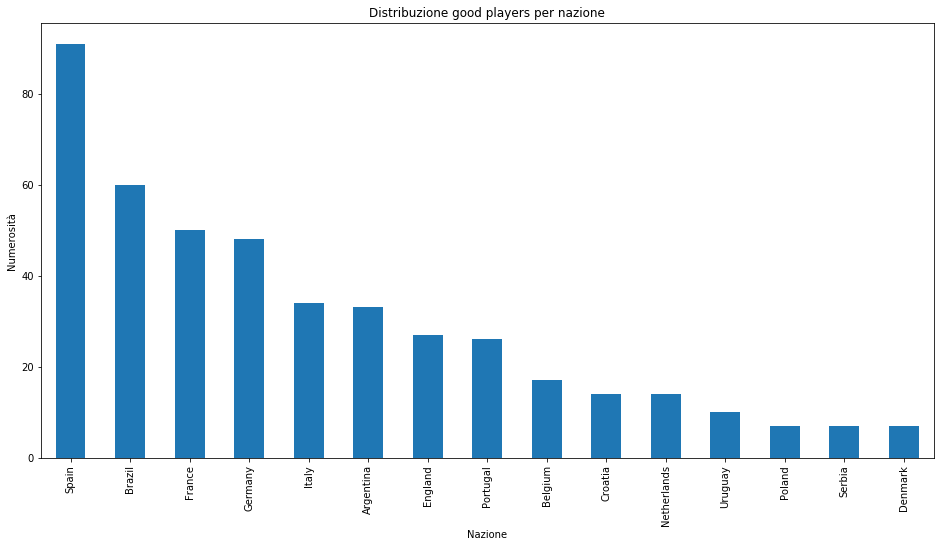

In [13]:
good_players_data = data[data['Overall'] >= 80]
good_players_data['Nationality'].value_counts().sort_values(ascending=False)[0:15].plot.bar(figsize=(16,8))
plt.title('Distribuzione good players per nazione')
plt.xlabel('Nazione')
plt.ylabel('Numerosità')
plt.show()

In [14]:
# Nations with good players
good_players_nations = good_players_data['Nationality'].value_counts().sort_values(ascending=False)[0:15]
good_players_nations_list = good_players_nations.index.tolist() 
good_players_nations

Spain          91
Brazil         60
France         50
Germany        48
Italy          34
Argentina      33
England        27
Portugal       26
Belgium        17
Croatia        14
Netherlands    14
Uruguay        10
Poland          7
Serbia          7
Denmark         7
Name: Nationality, dtype: int64

Come si può vedere dal precedente grafico a barre, le nazioni principali sono 15 e quella con il
maggior numero di good players è la Spagna.

A seguito di quanto sopra, qualora si volesse investire per la ricerca di un good players, sarebbe più utile considerare profili di nazionalità spagnola piuttosto che portoghese.

In [15]:
# Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(data['Nationality'].nunique()))
data['Nationality'].value_counts().head(5)

# European Countries have most players

Total number of countries : 164


England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

## Analisi popolazione

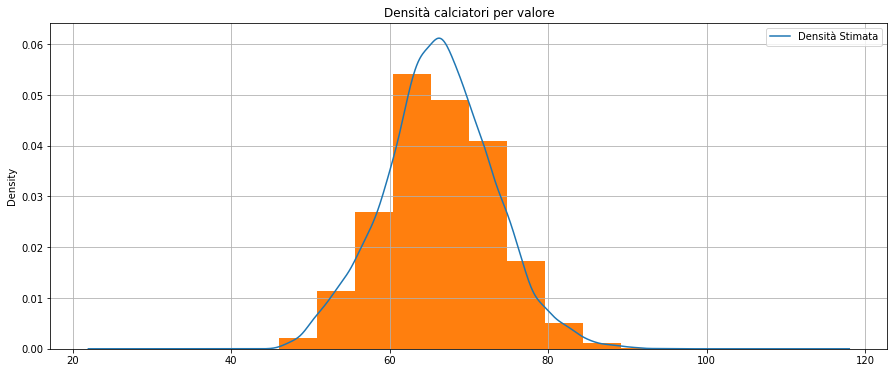

In [16]:
# Overall players density
data['Overall'].plot.density(figsize=(15,6))
plt.hist(data['Overall'], density=True)
plt.title('Densità calciatori per valore')
plt.legend(['Densità Stimata'])
plt.grid()
plt.show()

In [18]:
data['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

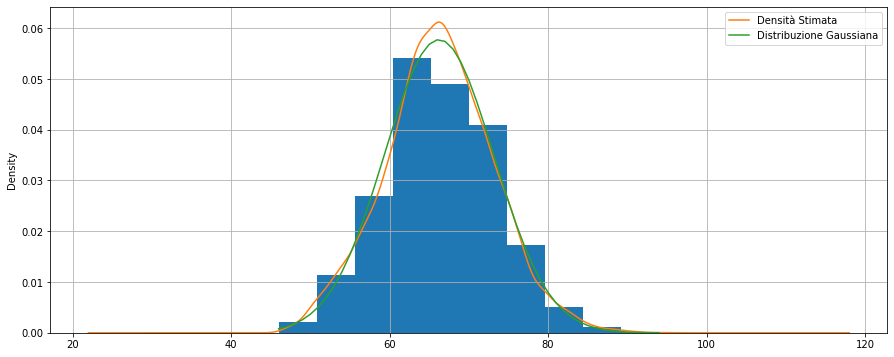

In [17]:
# Overall players density
mu = data['Overall'].mean()
sigma = data['Overall'].std()

g = norm(mu,sigma)
x = data['Overall'].unique()

plt.figure(figsize=(15,6))
data['Overall'].plot.hist(density=True)
data['Overall'].plot.density()
plt.plot(x,g.pdf(x))
plt.grid()
plt.legend(['Densità Stimata','Distribuzione Gaussiana'])
plt.show()

Come possiamo notare dal grafico precedente, i valori dei giocatori sembrano distribuirsi secondo una distribuzione Gaussiana di media 66.238699 e deviazione standard 6.908930.

Per completezza effettuiamo un plot della CDF.

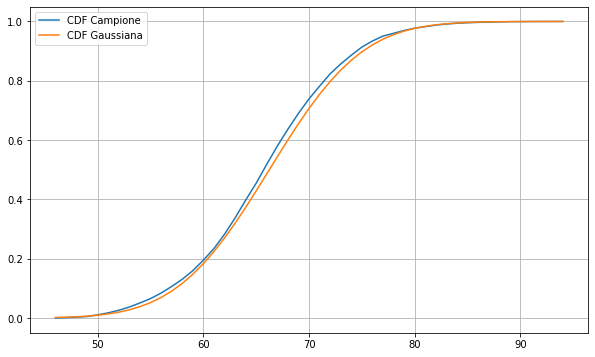

In [19]:
cdf_overall = data['Overall'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(10,6))
cdf_overall.plot()
plt.plot(x,g.cdf(x))
plt.grid()
plt.legend(['CDF Campione','CDF Gaussiana'])
plt.show()

Il plot ci permette di fare alcune considerazioni qualitative sulle due distribuzioni; in particolare, le due CDF si "assomigliano" in modo significativo.

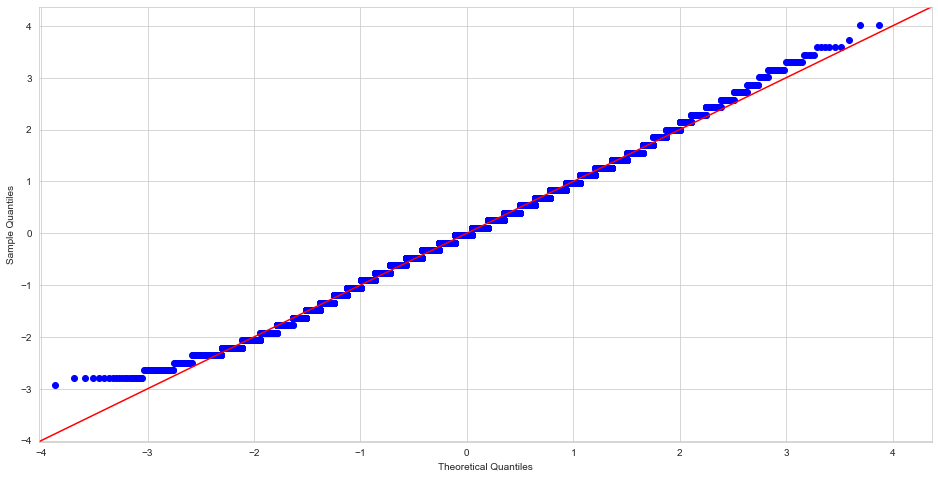

In [33]:
qqplot(data['Overall'], fit=True, line='45')
plt.show()

Il plot mette in relazione i quantili "teorici" con quelli del campione. Il fatto che solo pochi punti del plot non giacciano sulla diagonale indica, lieve asimmetria sinistra, che c'è una minima discrepanza tra la distribuzione empirica dei dati e quella Gaussiana. 

A seguito dell'analisi mediante CDF e Q-Q plot, possiamo affermare che l'ipotesi secondo la quale i dati si distribuiscono con un andamento gaussiano è corretta.

Vediamo adesso qualche altra informazione sul valore dei calciatori presenti nel nostro dataset.

In [20]:
data['Overall'].median()

66.0

In [21]:
data['Overall'].mode()[0]

66

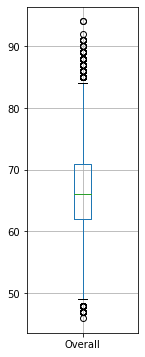

In [22]:
data['Overall'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Come possiamo notare, i giocatori di ottimo livello (top e, alcuni, good players) sono veramente pochi e risultano essere degli outliers.

Diamo uno sguardo ai boxplot delle prime 15 nazioni per numero di good players.

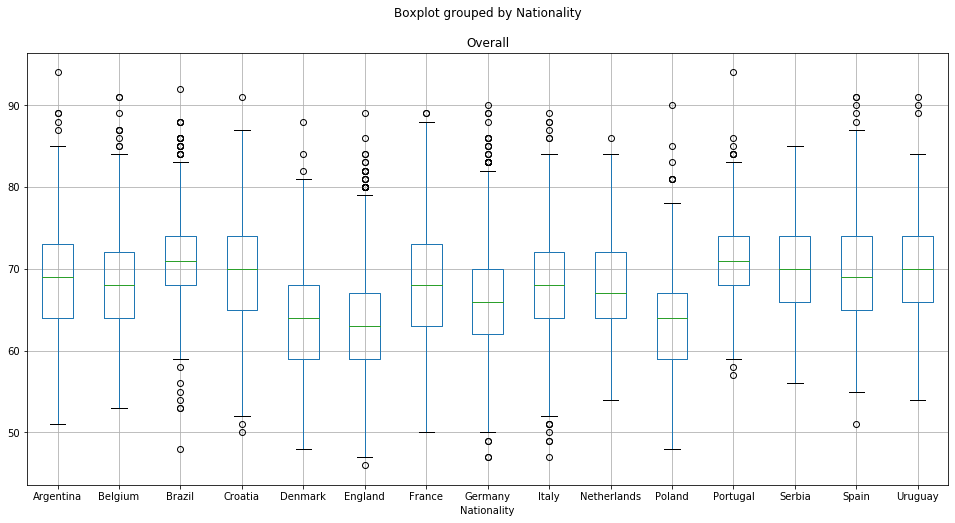

In [23]:
data_countries = data.loc[data['Nationality'].isin(good_players_nations_list)]
data_countries.boxplot(by='Nationality',column=['Overall'], figsize=(16,8))

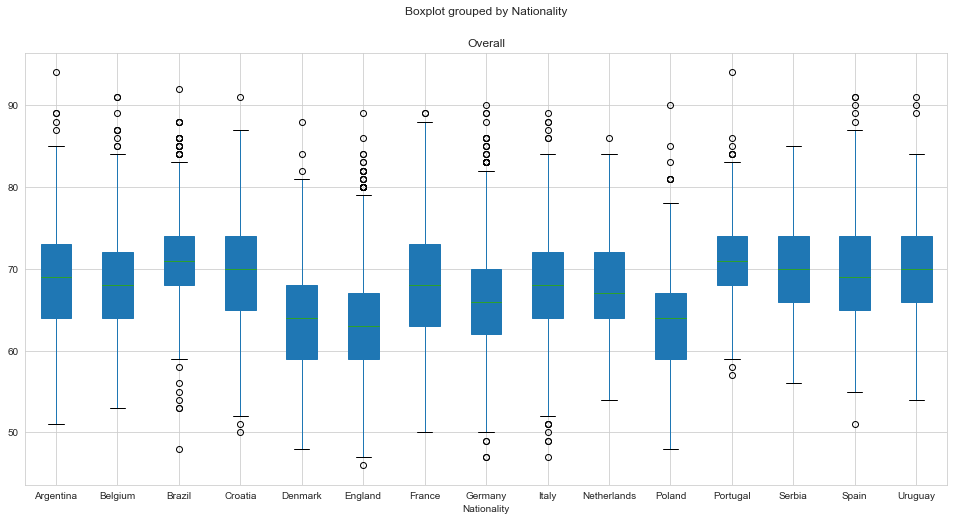

In [31]:
data_countries.boxplot(by='Nationality', column=['Overall'], patch_artist=True, figsize=(16,8))

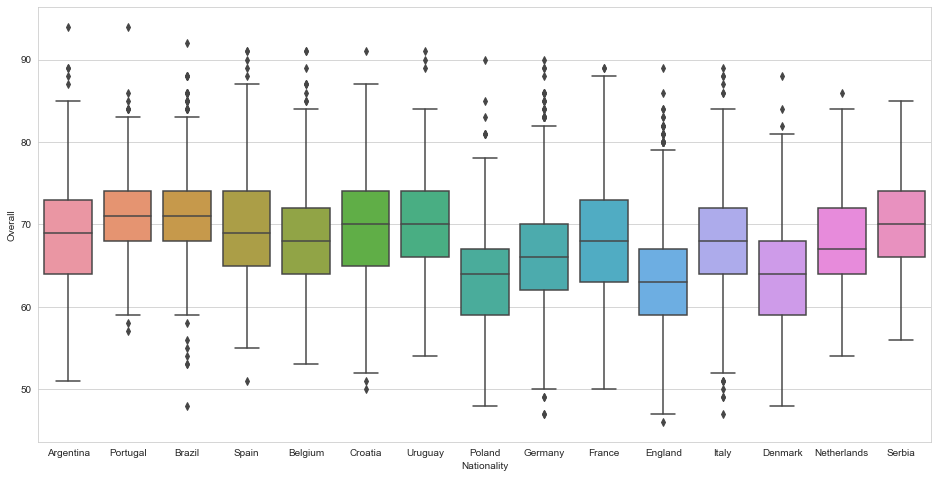

In [25]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style('whitegrid')
sns.boxplot(x = data_countries['Nationality'], y = data_countries['Overall'])

# Regressione Lineare

Adesso si proverà a calcolare una regressione lineare avendo come variabile dipendente overall e come variabili indipendenti: .....

## Preprocessing

Prima di calcolare la regressione effettuiamo una fase di preprocessing; vengono mantenuti solo ... e vengono rimosse tutte le colonne che non vengono usate.